In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

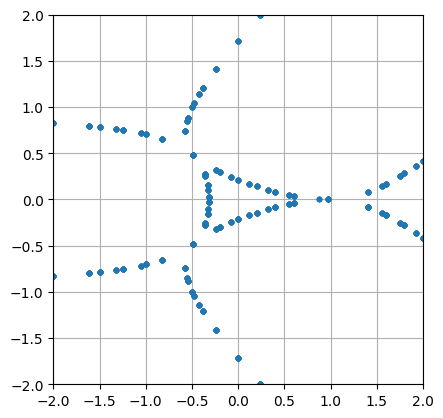

In [4]:
data = pd.read_csv('./original_phase_diagram.csv')
data.drop_duplicates()
x = data['x']
y = data['y']
plt.plot(x,y,'.')
plt.axis('square')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()
plt.show()

In [5]:
points = data.drop_duplicates()
points = points.dropna()
points = points.reset_index(drop=True)

drop_idx_1 = [86,88]
for i, point in points.iterrows():
    if point[0]>-0.3:
        drop_idx_1.append(i)
    elif point[1]>0.825081:
        drop_idx_1.append(i)
    elif point[1]<-0.825081:
        drop_idx_1.append(i)
first_part = points.drop(drop_idx_1)
first_part = first_part.sort_values('y')
lst_1 = first_part.index.to_list()

drop_idx_2 = []
drop_idx_2.extend(lst_1)
for i, point in points.iterrows():
    if point[0]>1 or point[0]<-1:
        drop_idx_2.append(i)
drop_idx_2.remove(120)
drop_idx_2.remove(122)
second_part = points.drop(drop_idx_2)
second_part = second_part.sort_values('y')
lst_2 = second_part.index.to_list()

drop_idx_3 =[]
for i, point in points.iterrows():
    if point[0]<0.7:
        drop_idx_3.append(i)
third_part = points.drop(drop_idx_3)
third_part = third_part.sort_values('y')


/tmp/ipykernel_17474/1366117000.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if point[0]>-0.3:
/tmp/ipykernel_17474/1366117000.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif point[1]>0.825081:
/tmp/ipykernel_17474/1366117000.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif point[1]<-0.825081:
/tmp/ipykernel_17474/1366117000.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. I

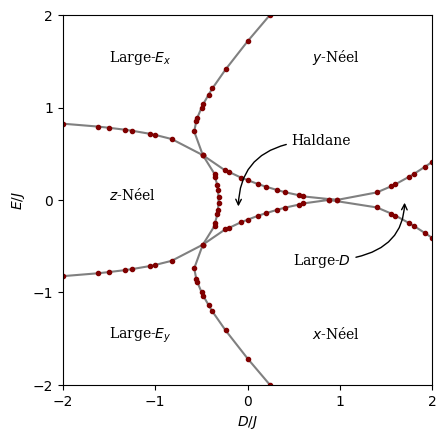

In [6]:
x1 = first_part['x']
y1 = first_part['y']
plt.plot(x1,y1,'-',color='gray')
plt.plot(x1,y1,'.', color = 'maroon')

x2 = second_part['x']
y2 = second_part['y']
plt.plot(x2, y2, '-', color = 'gray')
plt.plot(x2, y2, '.', color = 'maroon')

x3 = third_part['x']
y3 = third_part['y']
plt.plot(x3, y3, '-', color = 'gray')
plt.plot(x3, y3, '.', color = 'maroon')
plt.axis('square')
plt.xlim(-2,2),plt.ylim(-2,2)
plt.xticks([-2,-1,0,1,2]),plt.yticks([-2,-1,0,1,2])
plt.xlabel('$D/J$'),plt.ylabel('$E/J$')
plt.text(x=-1.5, y=-1.5, s='Large-$E_y$', fontdict={'family': 'serif'})
plt.text(x = -1.5, y = 0, s = '$z$-Néel', fontdict={'family': 'serif'})
plt.text(x = -1.5, y = 1.5, s = 'Large-$E_x$', fontdict={'family': 'serif'})
plt.text(x = .7, y = -1.5, s = '$x$-Néel', fontdict={'family': 'serif'})
plt.text(x = .7, y = 1.5, s = '$y$-Néel', fontdict={'family': 'serif'})
plt.annotate('Haldane',xy=(-.1,-.1), xytext=(0.8,0.6), arrowprops={'arrowstyle':'->', 'connectionstyle':"angle3,angleA=180,angleB=90"} ,horizontalalignment='center', fontfamily='serif')
plt.annotate('Large-$D$', xy = (1.7,0), xytext=(.8,-.7), arrowprops={'arrowstyle':'->', 'connectionstyle':"angle3,angleA=180,angleB=90"} ,horizontalalignment='center', fontfamily='serif')
plt.savefig('Original_phase_diagram.png', dpi=1000)
plt.show()

The process of making dataset

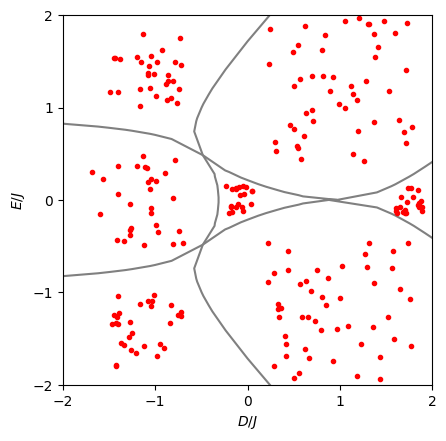

In [7]:
x1 = first_part['x']
y1 = first_part['y']
plt.plot(x1,y1,'-',color='gray')

x2 = second_part['x']
y2 = second_part['y']
plt.plot(x2, y2, '-', color = 'gray')

x3 = third_part['x']
y3 = third_part['y']
plt.plot(x3, y3, '-', color = 'gray')


np.random.seed(0)
def get_random_points(num_points, x, y, r):
    x = np.random.uniform(x-r, x+r, num_points)
    y = np.random.uniform(y-r, y+r, num_points)
    return x, y

phase_points = [
    (-1.1, 1.4),  # 0: Large-Ex
    (-1.1, -1.4), # 1: Large-Ey
    (-1.2, 0.0),  # 2: z-Neel
    (1, 1.2),   # 3: y-Neel
    (1, -1.2),  # 4: x-Neel
    (1.75, 0.0),   # 5: Large-D
    (-0.1, 0.0),   # 6: Haldane
]

feature_x = []
feature_y = []
target_points = []

def data(i, x, y, num_points):
    [target_points.append(i) for _ in range(num_points)]
    feature_x.extend(x.tolist())
    feature_y.extend(y.tolist())
         
for i, point in enumerate(phase_points):
    x, y = point
    if i == 0:
        x_list, y_list = get_random_points(num_points=30, x=x, y=y, r=0.4)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=30)
    elif i == 1:
        x_list, y_list = get_random_points(num_points=30, x=x, y=y, r=0.4)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=30)
    elif i == 2:
        x_list, y_list = get_random_points(num_points=30, x=x, y=y, r=0.5)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=30)
    elif i == 3:
        x_list, y_list = get_random_points(num_points=50, x=x, y=y, r=0.8)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=50)
    elif i == 4:
        x_list, y_list = get_random_points(num_points=50, x=x, y=y, r=0.8)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=50)
    elif i == 5:
        x_list, y_list = get_random_points(num_points=20, x=x, y=y, r=0.15)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=20)
    elif i == 6:
        x_list, y_list = get_random_points(num_points=20, x=x, y=y, r=0.15)
        plt.plot(x_list, y_list, '.', color='red')
        data(i, x_list, y_list, num_points=20)



plt.axis('square')  
plt.xlim(-2,2),plt.ylim(-2,2)
plt.xticks([-2,-1,0,1,2]),plt.yticks([-2,-1,0,1,2])
plt.xlabel('$D/J$'),plt.ylabel('$E/J$')
plt.savefig('Original_phase_diagram_with_random_points.png')
plt.show()

In [8]:
pd.DataFrame({'x': feature_x, 'y': feature_y, 'target': target_points}).to_csv('random_train_dataset.csv', index=False)

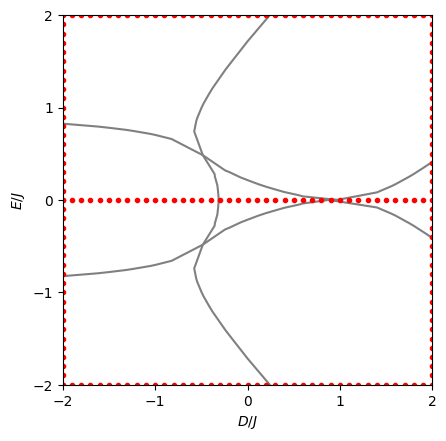

In [9]:
def points():
        E = np.arange(-2, 2.1, 0.1)
        D = np.arange(-2, 2.1, 0.1)
        lst_points = []
        lst_target = []

        for e in E:
            if 0.8 < e <= 2.0:
                lst_points.append([-2, e])
                lst_target.append(1)  # 'large_ex'
            elif -0.8 < e < 0.8:
                lst_points.append([-2, e])
                lst_target.append(3)  # 'z_neel'
            elif -2 <= e < -0.8:
                lst_points.append([-2, e])
                lst_target.append(2)  # 'large_ey'

        for e in E:
            if -2 <= e < -0.4:
                lst_points.append([2, e])
                lst_target.append(4)  # 'x_neel'
            elif -0.4 < e < 0.4:
                lst_points.append([2, e])
                lst_target.append(5)  # 'large_d'
            elif 0.4 < e <= 2.0:
                lst_points.append([2.0, e])
                lst_target.append(6)  # 'y_neel'
                
        for d in D:
            if -2 <= d < 0.2:
                lst_points.append([d, 2])
                lst_target.append(1)  # 'large_ex'
            elif 0.2 < d < 2.1:
                lst_points.append([d, 2.0])
                lst_target.append(6)  # 'y_neel'

        for d in D:
            if -2 <= d < 0.2:
                lst_points.append([d, -2])
                lst_target.append(2)  # 'large_ey'
            elif 0.2 < d <= 2.0:
                lst_points.append([d, -2])
                lst_target.append(4)  # 'x_neel'

        for d in np.arange(-2, -0.3, 0.1):  
            lst_points.append([d, 0.0]) # 'z_neel'
            lst_target.append(3) 

        for d in np.arange(0.9, 2, 0.1):
            lst_points.append([d, 0.0])
            lst_target.append(5)  # 'large_d'

        for d in np.arange(-0.3, 0.9, 0.1):
            lst_points.append([d, 0.0])
            lst_target.append(7) #'Haldane'


        points = np.array(lst_points)
        targets = np.array(lst_target)
    
        return points, targets

x1 = first_part['x']
y1 = first_part['y']
plt.plot(x1,y1,'-',color='gray')

x2 = second_part['x']
y2 = second_part['y']
plt.plot(x2, y2, '-', color = 'gray')

x3 = third_part['x']
y3 = third_part['y']
plt.plot(x3, y3, '-', color = 'gray')

plt.plot(points()[0][:, 0], points()[0][:, 1], '.', color='red')

plt.axis('square')  
plt.xlim(-2,2),plt.ylim(-2,2)
plt.xticks([-2,-1,0,1,2]),plt.yticks([-2,-1,0,1,2])
plt.xlabel('$D/J$'),plt.ylabel('$E/J$')
plt.savefig('Original_phase_diagram_with_random_points.png')
plt.show()

In [10]:
points = points()[0]
points.shape

(201, 2)

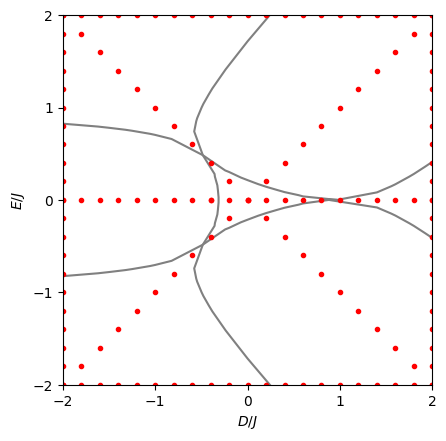

In [11]:
def points():
        E = np.arange(-2, 2.1, 0.2)
        D = np.arange(-2, 2.1, 0.2)
        lst_points = []
        lst_target = []

        for e in E:
            lst_points.append([e, -e])
            if e > 0.5: lst_target.append(1)  # 'large_ex'
            elif e < -0.1: lst_target.append(4)  # 'x_neel'
            elif -0.1 <= e <= 0.5: lst_target.append(7)  # 'Haldane'
        
        for e in E:
            lst_points.append([e, e])
            if e < -0.5: lst_target.append(2)  # 'large_ey'
            elif e > 0.1: lst_target.append(6)  # 'y_neel'
            elif -0.5 <= e <= 0.1: lst_target.append(7)  # 'Haldane'
                        
        for e in E:
            if 0.8 < e <= 2.0:
                lst_points.append([-2, e])
                lst_target.append(1)  # 'large_ex'
            elif -0.8 < e < 0.8:
                lst_points.append([-2, e])
                lst_target.append(3)  # 'z_neel'
            elif -2 <= e < -0.8:
                lst_points.append([-2, e])
                lst_target.append(2)  # 'large_ey'

        for e in E:
            if -2 <= e < -0.4:
                lst_points.append([2, e])
                lst_target.append(4)  # 'x_neel'
            elif -0.4 < e < 0.4:
                lst_points.append([2, e])
                lst_target.append(5)  # 'large_d'
            elif 0.4 < e <= 2.0:
                lst_points.append([2.0, e])
                lst_target.append(6)  # 'y_neel'
                
        for d in D:
            if -2 <= d < 0.2:
                lst_points.append([d, 2])
                lst_target.append(1)  # 'large_ex'
            elif 0.2 < d < 2.1:
                lst_points.append([d, 2.0])
                lst_target.append(6)  # 'y_neel'

        for d in D:
            if -2 <= d < 0.2:
                lst_points.append([d, -2])
                lst_target.append(2)  # 'large_ey'
            elif 0.2 < d <= 2.0:
                lst_points.append([d, -2])
                lst_target.append(4)  # 'x_neel'

        for d in np.arange(-2, -0.3, 0.2):  
            lst_points.append([d, 0.0]) # 'z_neel'
            lst_target.append(3) 

        for d in np.arange(1.0, 2.1, 0.2):
            lst_points.append([d, 0.0])
            lst_target.append(5)  # 'large_d'

        for d in np.arange(-0.4, 0.9, 0.2):
            lst_points.append([d, 0.0])
            lst_target.append(7) #'Haldane'


        points = np.array(lst_points)
        targets = np.array(lst_target)
    
        return points, targets

x1 = first_part['x']
y1 = first_part['y']
plt.plot(x1,y1,'-',color='gray')

x2 = second_part['x']
y2 = second_part['y']
plt.plot(x2, y2, '-', color = 'gray')

x3 = third_part['x']
y3 = third_part['y']
plt.plot(x3, y3, '-', color = 'gray')

plt.plot(points()[0][:, 0], points()[0][:, 1], '.', color='red')

plt.axis('square')  
plt.xlim(-2,2),plt.ylim(-2,2)
plt.xticks([-2,-1,0,1,2]),plt.yticks([-2,-1,0,1,2])
plt.xlabel('$D/J$'),plt.ylabel('$E/J$')
plt.savefig('Original_phase_diagram_with_random_points.png')
plt.show()

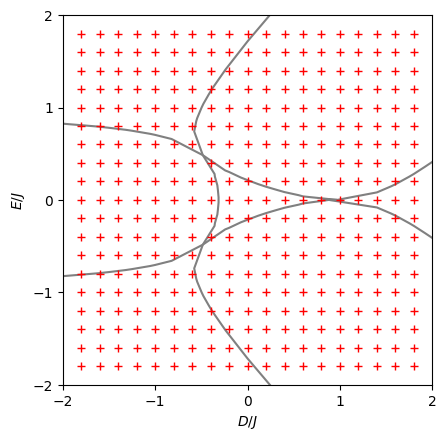

In [12]:
x1 = first_part['x']
y1 = first_part['y']
plt.plot(x1,y1,'-',color='gray')

x2 = second_part['x']
y2 = second_part['y']
plt.plot(x2, y2, '-', color = 'gray')

x3 = third_part['x']
y3 = third_part['y']
plt.plot(x3, y3, '-', color = 'gray')

E = np.arange(-1.8, 2, 0.2)
D = np.arange(-1.8, 2, 0.2)
lst_points = []
lst_target = []
for d in D:
    for e in E:
        lst_points.append([d, e])      

points = np.array(lst_points) 
plt.plot(points[:,0], points[:,1],'r+') 



plt.axis('square')
plt.xlim(-2,2),plt.ylim(-2,2)
plt.xticks([-2,-1,0,1,2]),plt.yticks([-2,-1,0,1,2])
plt.xlabel('$D/J$'),plt.ylabel('$E/J$')
plt.savefig('phase_diagram.png', dpi=1000)
plt.show()

In [13]:
x1 = np.array(x1)
y1 = np.array(y1)
points1 = np.column_stack((x1, y1))

x5 = np.array(x3)
y5 = np.array(y3)
points5 = np.column_stack((x3, y3))


In [14]:
data = pd.read_csv('./original_phase_diagram.csv')
points = data.drop_duplicates()
points = points.dropna()
points = points.reset_index(drop=True)

mask_1 = (points['y'] >= 0.48) & (points['y'] <= 2) & (points['x'] >= -2) & (points['x'] <= 0.4)
first_part = points[mask_1].copy()
first_part.sort_values(by='x', ascending=True, inplace=True)
Large_Ex = pd.concat([first_part.loc[:85], first_part.loc[[120, 123]], first_part.loc[88:]])
fix_row_1 = pd.DataFrame([[-2, 2]], columns=Large_Ex.columns)
Large_Ex = pd.concat([Large_Ex, fix_row_1], ignore_index=True)
Large_Ex.drop_duplicates(inplace=True)

drop_idx_2 = [86,88]
for i, point in points.iterrows():
    if point['x']>-0.3 or point['y']>0.825081 or point['y']<-0.825081:
        drop_idx_2.append(i)
second_part = points.drop(drop_idx_2)
zNeel = second_part.sort_values('y')

mask_3 = (points['y'] <= -0.48) & (points['y'] >= -2) & (points['x'] >= -2.1) & (points['x'] <= 0.4)
third_part = points[mask_3].copy()
third_part.sort_values(by='x', ascending=True, inplace=True)
Large_Ey = pd.concat([third_part.loc[:89], third_part.loc[[122, 121]], third_part.loc[86:]])
fix_row_3 = pd.DataFrame([[-2.1, -2.1]], columns=Large_Ey.columns)
Large_Ey = pd.concat([Large_Ey, fix_row_3], ignore_index=True)
Large_Ey.drop_duplicates(inplace=True)

mask_4_1 = (points['x'] >= -0.3) & (points['x'] <= 2.0) & (points['y'] >= 0.0) & (points['y'] <= 0.6)
yNeel_1 = points[mask_4_1].copy()
yNeel_1.sort_values(by='x', ascending=True, inplace=True)
mask_4_2 = (points['x'] >= -0.7) & (points['x'] <= 0.5) & (points['y'] <= 2.0) & (points['y'] >= 0.30)
yNeel_2 = points[mask_4_2].copy()
yNeel_2.sort_values(by='y', ascending=False, inplace=True)
fix_row_4 = pd.DataFrame([[2, 2]], columns=yNeel_1.columns)
yNeel = pd.concat([yNeel_2, yNeel_1, fix_row_4], ignore_index=True)
yNeel.drop_duplicates(inplace=True)

mask_5 = (points['x'] >= 0.9) & (points['x'] <= 2.0) & (points['y'] >= -1) & (points['y'] <= 1)
Large_D = points[mask_5].copy()
Large_D.sort_values(by='y', ascending=True, inplace=True)
Large_D.drop_duplicates(inplace=True)

mask_6_1 = (points['x'] >= -0.3) & (points['x'] <= 2.0) & (points['y'] >= -0.6) & (points['y'] <= 0.0)
xNeel_1 = points[mask_6_1].copy()
xNeel_1.sort_values(by='x', ascending=False, inplace=True)
mask_6_2 = (points['x'] >= -0.7) & (points['x'] <= 0.5) & (points['y'] <= -0.3) & (points['y'] >= -2.1)
xNeel_2 = points[mask_6_2].copy()
xNeel_2.sort_values(by='y', ascending=False, inplace=True)
fix_row_6 = pd.DataFrame([[2, -2.1]], columns=yNeel_1.columns)
xNeel = pd.concat([xNeel_1,xNeel_2, fix_row_6], ignore_index=True)
xNeel.drop_duplicates(inplace=True)

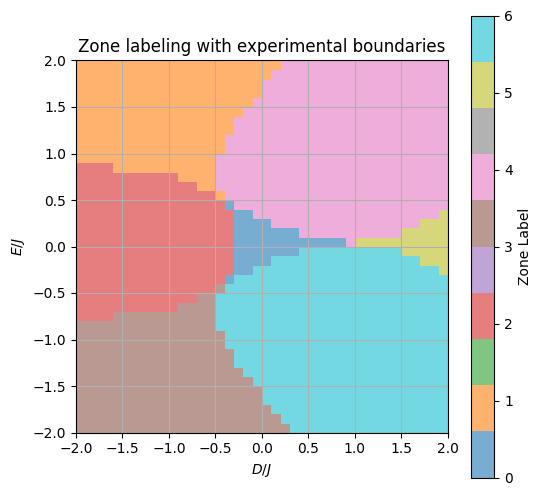

In [17]:
from matplotlib.path import Path
import numpy as np
import matplotlib.pyplot as plt

polygon1 = Path(Large_Ex)
polygon2 = Path(zNeel)
polygon3 = Path(Large_Ey)
polygon4 = Path(yNeel)
polygon5 = Path(Large_D)
polygon6 = Path(xNeel)

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)
points = np.vstack((X.ravel(), Y.ravel())).T

zone1 = polygon1.contains_points(points)  
zone2 = polygon2.contains_points(points)  
zone3 = polygon3.contains_points(points)  
zone4 = polygon4.contains_points(points)  
zone5 = polygon5.contains_points(points)  
zone6 = polygon6.contains_points(points) 

labels = np.zeros(points.shape[0], dtype=int)

labels[zone1] = 1
labels[zone2] = 2
labels[zone3] = 3
labels[zone4] = 4
labels[zone5] = 5
labels[zone6] = 6

labels = labels.reshape(X.shape)

plt.figure(figsize=(6, 6))
plt.imshow(labels, origin='lower', extent=[-2, 2, -2, 2], cmap='tab10', alpha=0.6)
plt.xlabel('$D/J$')
plt.ylabel('$E/J$')
plt.title('Zone labeling with experimental boundaries')
plt.colorbar(label='Zone Label')
plt.grid(True)
plt.show()


In [19]:
pd.DataFrame({'x': X.reshape(-1), 'y': Y.reshape(-1), 'target': labels.reshape(-1)}).to_csv('scatter_points.csv', index=False)